CNN - ON MNIST - THE DATA PREPERATION

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
from tensorflow.keras.datasets import mnist

In [93]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [94]:
x_train.shape

(60000, 28, 28)

In [95]:
single_image = x_train[0]

In [96]:
single_image.shape

(28, 28)

In [97]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

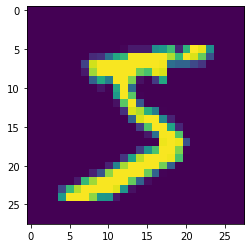

In [38]:
plt.imshow(single_image)

In [39]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [40]:
from tensorflow.keras.utils import to_categorical

In [41]:
y_train.shape

(60000,)

In [42]:
y_example = to_categorical(y_train)

In [43]:
y_example.shape

(60000, 10)

In [44]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [45]:
y_cat_test = to_categorical(y_test, num_classes =10)

In [46]:
y_cat_train = to_categorical(y_train, 10)

In [47]:
single_image.max()

255

In [48]:
single_image.min()

0

In [49]:
x_train = x_train/255

In [50]:

x_test = x_test/255

In [51]:
scaled_image = x_train[0]

In [52]:
scaled_image.max()

1.0

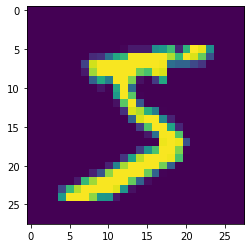

In [53]:
plt.imshow(scaled_image)

In [54]:
x_train.shape

(60000, 28, 28)

In [55]:
x_train = x_train.reshape(60000,28,28,1)

In [56]:
#batch size, width, height, color_channels
x_train = x_train.reshape(60000,28,28,1)

In [57]:
x_test = x_test.reshape(10000,28,28,1)

CNN on MNIST Creating and Training the Model

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [62]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape = (28,28,1), activation = 'relu')) # input shape # hyperparameter

model.add(MaxPool2D(pool_size=(2,2))) 

model.add(Flatten())   # hyperparameter

model.add(Dense(128, activation = 'relu'))

# OUTPUT LAYER SOFTMAX---> MULTI CLASS
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 1)

In [68]:
model.fit(x_train, y_cat_train, epochs = 10, validation_data = (x_test, y_cat_test), 
          callbacks = [early_stop])

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1360 - accuracy: 0.9594 - val_loss: 0.0470 - val_accuracy: 0.9849
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0456 - accuracy: 0.9865 - val_loss: 0.0402 - val_accuracy: 0.9871
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0294 - accuracy: 0.9911 - val_loss: 0.0482 - val_accuracy: 0.9844


CNN WITH MNIST - MODEL EVALUATION

In [69]:
metrics = pd.DataFrame(model.history.history)

In [72]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.135967,0.959367,0.046950,0.9849
1,0.045568,0.986483,0.040163,0.9871
2,0.029431,0.991117,0.048236,0.9844


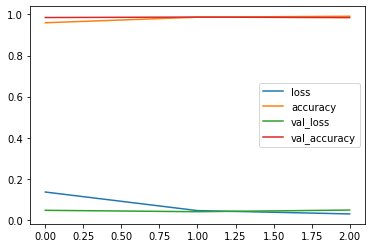

In [71]:
metrics.plot()

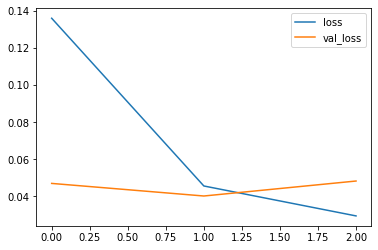

In [73]:
metrics[['loss', 'val_loss']].plot()

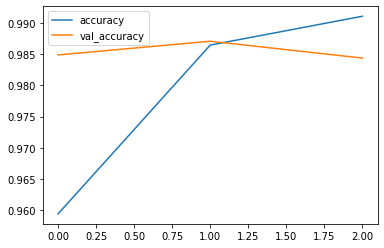

In [74]:
metrics[['accuracy', 'val_accuracy']].plot()

In [75]:
model.metrics_names

['loss', 'accuracy']

In [76]:
model.evaluate(x_test, y_cat_test, verbose =0)

[0.048236310482025146, 0.9843999743461609]

In [77]:
from sklearn.metrics import  classification_report, confusion_matrix

In [78]:
prediction = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [79]:
y_cat_test.shape

(10000, 10)

In [80]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [82]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.96      0.98       974
           9       0.94      0.99      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [84]:
confusion_matrix(y_test, prediction)

array([[ 961,    0,    1,    0,    0,    0,    1,    1,    1,   15],
       [   0, 1132,    0,    1,    0,    0,    0,    1,    1,    0],
       [   0,    1, 1020,    0,    1,    0,    0,    7,    0,    3],
       [   0,    0,    4,  996,    0,    3,    0,    1,    1,    5],
       [   1,    0,    0,    0,  966,    0,    1,    1,    0,   13],
       [   2,    0,    0,    5,    0,  876,    2,    0,    0,    7],
       [   8,    3,    0,    1,    1,    2,  942,    0,    1,    0],
       [   0,    1,    5,    0,    0,    0,    0, 1016,    1,    5],
       [   8,    1,    4,    0,    2,    1,    1,    6,  934,   17],
       [   0,    1,    0,    1,    4,    0,    0,    2,    0, 1001]])

In [85]:
import seaborn as sns

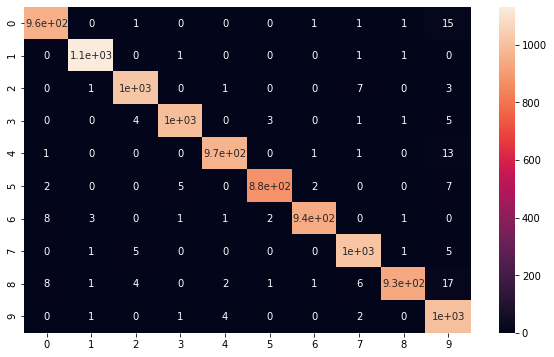

In [87]:
plt.figure(figsize=(10,6))

sns.heatmap(confusion_matrix(y_test, prediction), annot = True)

In [88]:
my_number = x_test[0]

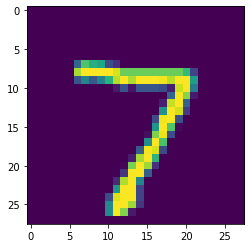

In [89]:
plt.imshow(my_number.reshape(28,28))

In [90]:
# num_images, width, height, color_channels
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])